In [3]:
# Importing the important libraries
import pandas as pd
import numpy as np
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [4]:
# Importing the Iris dataset
df = pd.read_csv("iris.csv")

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# checking the columns and the data type, also the null value
df.info()

# observation: From here we can see that there is no null values in the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
# We have 6 columns in which 'Id' column is just the row number.
# Dropping the 'Id' column
df = df.drop(labels = ['Id'], axis = 1)

In [10]:
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [11]:
# Now we have 4 feature columns and one column with different category
# Getting the different categories
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
# observation: There are 3 different categories here.
# Either we can do a multiclass classification or
# we can drop one category and do the binary classification
# Lets do the binary classification first
df = df[df['Species']!='Iris-setosa']

In [13]:
df.info()
# we are left with 100 data point after droping the Iris-setosa category

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 50 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  100 non-null    float64
 1   SepalWidthCm   100 non-null    float64
 2   PetalLengthCm  100 non-null    float64
 3   PetalWidthCm   100 non-null    float64
 4   Species        100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.7+ KB


In [14]:
# Lets check for duplicates
df.duplicated().sum()

1

In [15]:
# observation: There is one duplicate available in the data, which need to be removed
df.drop_duplicates(keep='first',inplace=True)

In [16]:
# Again checking the duplicates
df.duplicated().sum()

0

* Untill this point, data preprocessing is done. 
* Now we will move towards feature selection.

***
**Feature Selection**

In [17]:
# Checking correlation
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df.corr()
# Gives the Pearson correlation coefficient between numeric features

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,0.552301,0.832449,0.599798
SepalWidthCm,0.552301,1.000000,0.521900,0.570571
PetalLengthCm,0.832449,0.521900,1.000000,0.823484
PetalWidthCm,0.599798,0.570571,0.823484,1.000000


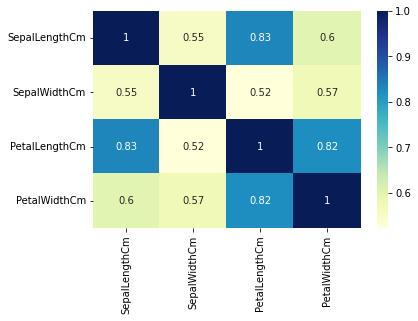

In [22]:
# Drawing the correlation heatmap
sns.heatmap(df.corr() , cmap='YlGnBu',annot=True)
plt.show()

In [ ]:
df.corr